In [3]:
%load_ext pycodestyle_magic

The pycodestyle_magic extension is already loaded. To reload it, use:
  %reload_ext pycodestyle_magic


In [4]:
%pycodestyle_on

# Oferta de Terrenos en venta en CABA 

## Descripción del Dataset.
* Últimos datos disponibles: 2020.

La información utilizada se encuentra disponible de forma pública en el sitio web de la Ciudad de Buenos Aires. 
URL: https://cdn.buenosaires.gob.ar/datosabiertos/datasets/secretaria-de-desarrollo-urbano/terrenos-valor-oferta/Terrenos-en-venta-2020.csv

En el presente notebook se relizará un análisis exploratorio de lo datos centrados en las diferentes Comunas de la Cuiudad de Buenos Aires. 

In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
from scipy import stats as st
plt.style.use('ggplot')

8:1: W391 blank line at end of file


In [24]:
url = ('https://cdn.buenosaires.gob.ar/datosabiertos/datasets/secretaria-de-desarrollo-urbano/terrenos-valor-oferta/Terrenos-en-venta-2020.csv')
df = pd.read_csv(url)

1:80: E501 line too long (144 > 79 characters)


In [7]:
df.head()

,DIRECCION,PROPIEDADS,PRECIOUSD,PRECIOPESO,DOLARM2,PESOSM2,COTIZACION,TRIMESTRE_,BARRIO,COMUNA_
0,RIVADAVIA 3500,190,150000,12000000,790,63158,80,CUARTO,ALMAGRO,5
1,PRINGLES 100,242,230000,18400000,950,76033,80,CUARTO,ALMAGRO,5
2,"PERON, JUAN DOMINGO, TTE. 3400",211,265000,21200000,1256,100474,80,CUARTO,ALMAGRO,5
3,MEXICO 4000,320,300000,24000000,938,75000,80,CUARTO,ALMAGRO,5
4,VENEZUELA 4067,250,305000,24400000,1220,97600,80,CUARTO,ALMAGRO,5


In [29]:
# Renombrado de columnas para mejor interpetación
df = df.rename(columns={'PROPIEDADS':'Superficie',
                         'PRECIOUSD':'PrecioUSD',
                         'TRIMESTRE_':'Trimestre',
                         'COMUNA_':'Comuna'
                       })
# Convierte todos los nombres de columnas con la primer letra mayúscula. 

df.columns = df.columns.str.title()
df.head()

,Direccion,Superficie,Preciousd,Preciopeso,Dolarm2,Pesosm2,Cotizacion,Trimestre,Barrio,Comuna
0,RIVADAVIA 3500,190,150000,12000000,790,63158,80,CUARTO,ALMAGRO,5
1,PRINGLES 100,242,230000,18400000,950,76033,80,CUARTO,ALMAGRO,5
2,"PERON, JUAN DOMINGO, TTE. 3400",211,265000,21200000,1256,100474,80,CUARTO,ALMAGRO,5
3,MEXICO 4000,320,300000,24000000,938,75000,80,CUARTO,ALMAGRO,5
4,VENEZUELA 4067,250,305000,24400000,1220,97600,80,CUARTO,ALMAGRO,5


ValueError: too many values to unpack (expected 3)

In [9]:
df.columns

Index(['Direccion', 'Superficie', 'Preciousd', 'Preciopeso', 'Dolarm2',
       'Pesosm2', 'Cotizacion', 'Trimestre', 'Barrio', 'Comuna'],
      dtype='object')

In [10]:
df.dtypes

Direccion     object
Superficie     int64
Preciousd      int64
Preciopeso     int64
Dolarm2        int64
Pesosm2        int64
Cotizacion     int64
Trimestre     object
Barrio        object
Comuna         int64
dtype: object

In [34]:
# Reemplazo el nombre del trimestre por el correspondiente número
# para operaciones cálculos más adelante.

trimestres = df.Trimestre.unique()
reemplazo = [4, 1, 2, 3]

for i in range(4):
    df['Trimestre'] = df.Trimestre.replace(trimestres[i], reemplazo[i])

In [12]:
df.describe()

,Superficie,Preciousd,Preciopeso,Dolarm2,Pesosm2,Cotizacion,Trimestre,Comuna
count,10301.000000,1.030100e+04,1.030100e+04,10301.000000,1.030100e+04,10301.000000,10301.000000,10301.000000
mean,455.793224,9.047248e+05,6.079176e+07,2357.650811,1.578518e+05,67.210659,2.118241,9.256189
std,766.807591,1.131263e+06,7.824747e+07,1600.258396,1.075193e+05,4.017352,0.558429,4.329207
min,30.000000,6.800000e+04,4.352000e+06,355.000000,2.270500e+04,64.000000,1.000000,1.000000
25%,200.000000,3.500000e+05,2.352000e+07,1238.000000,8.323400e+04,64.000000,2.000000,5.000000
50%,291.000000,5.800000e+05,3.825000e+07,1918.000000,1.283210e+05,67.000000,2.000000,10.000000
75%,433.000000,9.800000e+05,6.400000e+07,3019.000000,2.008670e+05,70.000000,2.000000,13.000000
max,14303.000000,1.600000e+07,1.280000e+09,21429.000000,1.714286e+06,80.000000,4.000000,15.000000


In [13]:
df.Comuna.value_counts()

15    1531
12    1150
11    1004
10     965
4      806
3      688
5      664
7      603
9      593
13     578
14     578
1      529
6      414
8      118
2       80
Name: Comuna, dtype: int64

In [36]:
# hay 6 valores nulos en la dirección.
df.isnull().sum()

Direccion     6
Superficie    0
Preciousd     0
Preciopeso    0
Dolarm2       0
Pesosm2       0
Cotizacion    0
Trimestre     0
Barrio        0
Comuna        0
dtype: int64

In [38]:
# Diferentes cotizaciones de dolar en el dataset.
df.Cotizacion.unique()

array([80, 64, 70, 67], dtype=int64)

## Evaluación de la presencia de datos faltantes

* Faltan 6 direcciones. No parecen estar duplicados aunque falte la dirección porque el precio por M2 y la superficie, comuna, barrio no coinciden entre sí. 

In [40]:
# Los duplicados, aunque no tienen direccion, no parecen ser duplicados.
df.loc[df.Direccion.isnull(), :]

,Direccion,Superficie,Preciousd,Preciopeso,Dolarm2,Pesosm2,Cotizacion,Trimestre,Barrio,Comuna
2256,NaN,323,1600000,102400000,4954,317028,64,2,NUÑEZ,13
2976,NaN,1100,3500000,224000000,3182,203636,64,2,VILLA CRESPO,15
3017,NaN,1050,520000,33280000,495,31695,64,2,VILLA CRESPO,15
3981,NaN,221,420000,26880000,1900,121629,64,2,PARQUE PATRICIOS,4
3985,NaN,128,350000,22400000,2734,175000,64,2,PARQUE PATRICIOS,4
4164,NaN,260,450000,28800000,1731,110769,64,2,VILLA LURO,10


## Limipeza del dataset: presencia de datos duplicados/redundantes

* Se observa que hay combinación de direcciones, superficies y precio m2 en dólares que se repiten, independientemente del número de trimestre. 
* Las repeticiones están ocasionadas por el valor de la cotización del dólar y la conversión a pesos de los precios de los terrenos. 
* En este análisis es de interés la evolución de precios en pesos ni el tipo de cambio. Primero se removerán estas variables y luego se eliminaran los duplicados generados por la eliminación de variables.

In [42]:
# Elimino las variables que no son de interés.
df_dolar = df.drop(['Pesosm2', 'Preciopeso', 'Cotizacion'], axis=1)
df_dolar

,Direccion,Superficie,Preciousd,Dolarm2,Trimestre,Barrio,Comuna
0,RIVADAVIA 3500,190,150000,790,4,ALMAGRO,5
1,PRINGLES 100,242,230000,950,4,ALMAGRO,5
2,"PERON, JUAN DOMINGO, TTE. 3400",211,265000,1256,4,ALMAGRO,5
3,MEXICO 4000,320,300000,938,4,ALMAGRO,5
4,VENEZUELA 4067,250,305000,1220,4,ALMAGRO,5
...,...,...,...,...,...,...,...
10296,"BONORINO, ESTEBAN, Cnel. 300",149,430000,2886,1,FLORES NORTE,7
10297,RIVERA INDARTE 100,500,790000,1580,1,FLORES NORTE,7
10298,"ALVAREZ, DONATO, Tte. Gral. 200",771,690000,895,1,FLORES NORTE,7
10299,"ALBERDI, JUAN BAUTISTA 3100",409,800000,1956,1,FLORES NORTE,7


In [46]:
# Revisamos los terrenos duplicados

columns_to_check = ['Direccion', 'Superficie', 'Barrio', 'Preciousd']
duplicate = df[df.duplicated(columns_to_check, keep=False)]
duplicate = duplicate.sort_values(by='Direccion')

duplicate

,Direccion,Superficie,Preciousd,Preciopeso,Dolarm2,Pesosm2,Cotizacion,Trimestre,Barrio,Comuna
2705,.ANDONAEGUI,364,450000,28800000,1236,79121,64,2,PARQUE CHAS,15
8054,.ANDONAEGUI,364,450000,30240000,1236,83077,67,2,PARQUE CHAS,15
6388,.ANDONAEGUI,364,450000,31275000,1236,85920,70,2,PARQUE CHAS,15
8055,.CAMPILLO,364,500000,33600000,1374,92308,67,2,PARQUE CHAS,15
2702,.CAMPILLO,364,500000,32000000,1374,87912,64,2,PARQUE CHAS,15
...,...,...,...,...,...,...,...,...,...,...
6043,zavaleta al 200,201,250000,17375000,1244,86443,70,2,PARQUE PATRICIOS,4
9264,zavaleta al 200,201,250000,16800000,1244,83582,67,2,PARQUE PATRICIOS,4
8090,Álvarez Jonte 2100,244,370000,24864000,1516,101902,67,2,PATERNAL,15
2761,Álvarez Jonte 2100,244,370000,23680000,1516,97049,64,2,PATERNAL,15


In [49]:
# Se repiten propiedades durante el mismo trimestre
# por variación en la cotización del dólar.
duplicate.sort_values(['Direccion', 'Trimestre'])

,Direccion,Superficie,Preciousd,Preciopeso,Dolarm2,Pesosm2,Cotizacion,Trimestre,Barrio,Comuna
2705,.ANDONAEGUI,364,450000,28800000,1236,79121,64,2,PARQUE CHAS,15
8054,.ANDONAEGUI,364,450000,30240000,1236,83077,67,2,PARQUE CHAS,15
6388,.ANDONAEGUI,364,450000,31275000,1236,85920,70,2,PARQUE CHAS,15
8055,.CAMPILLO,364,500000,33600000,1374,92308,67,2,PARQUE CHAS,15
2702,.CAMPILLO,364,500000,32000000,1374,87912,64,2,PARQUE CHAS,15
...,...,...,...,...,...,...,...,...,...,...
6043,zavaleta al 200,201,250000,17375000,1244,86443,70,2,PARQUE PATRICIOS,4
9264,zavaleta al 200,201,250000,16800000,1244,83582,67,2,PARQUE PATRICIOS,4
8090,Álvarez Jonte 2100,244,370000,24864000,1516,101902,67,2,PATERNAL,15
2761,Álvarez Jonte 2100,244,370000,23680000,1516,97049,64,2,PATERNAL,15


Se eliminaron terrenos duplicados teniendo en cuenta solo la cotización en dólares. 

In [53]:
# Elimino duplicados
df_dolar = df_dolar.drop_duplicates()

# Checkeo que no hay más duplicados
print(df_dolar[df_dolar.duplicated()].shape)

# Checkeo con un ejemplo que se retuvo uno de los registros para los duplicados
df_dolar.loc[df_dolar['Direccion'] == '.ANDONAEGUI', :]

,Direccion,Superficie,Preciousd,Dolarm2,Trimestre,Barrio,Comuna
2705,.ANDONAEGUI,364,450000,1236,2,PARQUE CHAS,15


Algunos terrenos permanecieron en venta durante más de un trimestre. Sin embargo, no es de interés para este análisis contar estos terrenos más de una vez. 
Se identificarán los terrenos repetidos por aquellos que coinciden la Superficie y la Dirección. En caso de duplicados exactos con excepción del trimestre, se va a elegir el dato del último trimestre. En caso de variaciones en el precio por metro cuadrado en dólares, se va a conservar el registro con el mayor precio. 

In [69]:
# Seleccionamos los datos duplicados y ordenamos por Trimestre (descendente)
# y Valor del metro cuadrado (descendente)

columns_to_check2 = ['Direccion', 'Superficie']
columns_to_sort = ['Direccion', 'Superficie', 'Trimestre', 'Dolarm2']
sort_order = [True, True, False, False]

duplicados_todos = df_dolar[df_dolar.duplicated(columns_to_check2, keep=False)]
duplicados_todos = duplicados_todos.sort_values(columns_to_sort, ascending=sort_order)
print(f'todos los duplicados: {duplicados_todos.shape}')


# Contamos con cuántos datos que tienen duplicados nos vamos a quedar
uno_por_duplicado = df_dolar[df_dolar.duplicated(columns_to_check2, keep='first')]
print(f'cantidad de datos a conservar: {uno_por_duplicado.shape}')

# Dataframe con los duplicados seleccionados par conservar
conservar = duplicados_todos.drop_duplicates(columns_to_check2, keep='first')
print(f' nro de duplicados a conservar: {conservar.shape}')

# Dtos no duplicasos
no_duplicados = df_dolar[~ df_dolar.duplicated(columns_to_check2, keep=False)]
print(f' nro de datos sin duplicados {no_duplicados.shape}')

# Creamos un nuevo dataframe con los datos duplicados a conservar
# y los datos no duplicados del df original
df_dolar_f = pd.concat([no_duplicados, conservar])
df_dolar_f.reset_index(inplace=True, drop=True)   # nuevo indice para el df
df_dolar_f.head()

# Revisamos que el numero de datos finales coincida con los cálculos anteriores
print(f' nuevo tamaño del datset: {df_dolar_f.shape}')

# Elimino la columna Trimestre
if 'Trimestre' in df_dolar_f.columns:
    df_dolar_f = df_dolar_f.drop('Trimestre', axis=1)

# Reviso el dataset final.
df_dolar_f.head()

,Direccion,Superficie,Preciousd,Dolarm2,Barrio,Comuna
0,RIVADAVIA 3500,190,150000,790,ALMAGRO,5
1,PRINGLES 100,242,230000,950,ALMAGRO,5
2,"PERON, JUAN DOMINGO, TTE. 3400",211,265000,1256,ALMAGRO,5
3,MEXICO 4000,320,300000,938,ALMAGRO,5
4,VENEZUELA 4067,250,305000,1220,ALMAGRO,5


9:80: E501 line too long (86 > 79 characters)
14:80: E501 line too long (82 > 79 characters)


## Descripción del tamaño (superficie) de los terrenos.

Se realizó un análisis descriptivo de la superficie de los terrenos agrupados por comuna. 

In [73]:
# Tabla con medidas agregadas para la Superficie agrupado por Comuna.
comunas_df = df_dolar_f.groupby(['Comuna'])
comunas_df = comunas_df.agg({'Superficie':['sum','mean', 'median','std','count']})
comunas_df.reset_index(inplace=True)

#renombrado de columnas de la tabla resumen
comunas_df.columns = ['Comuna', 'Superficie_Total', 'Media', 'Mediana','sd','n']

#superficie total en porcentaje
superficie_p = comunas_df.Superficie_Total/comunas_df.Superficie_Total.sum()*100
comunas_df['Superficie_porcentual'] = superficie_p
comunas_df = comunas_df.apply(lambda x:x.round(1))

comunas_df

,Comuna,Superficie_Total,Media,Mediana,sd,n,Superficie_porcentual
0,1,203022,709.9,484.0,924.9,286,8.2
1,2,20346,415.2,224.0,514.6,49,0.8
2,3,190132,549.5,302.0,1048.3,346,7.7
3,4,229387,589.7,328.0,787.2,389,9.3
4,5,173360,536.7,312.0,788.5,323,7.0
5,6,111266,567.7,300.0,1212.2,196,4.5
6,7,177655,558.7,309.0,1340.8,318,7.2
7,8,95790,1496.7,300.5,3367.5,64,3.9
8,9,101775,358.4,260.0,485.3,284,4.1
9,10,193184,411.0,278.0,469.9,470,7.8


ValueError: too many values to unpack (expected 3)

- Superficie total en venta por Comuna (de mayor a menor)

In [74]:
comunas_df.sort_values(by='Superficie_Total', ascending=False).head(3)

,Comuna,Superficie_Total,Media,Mediana,sd,n,Superficie_porcentual
14,15,331743,428.6,259.0,757.5,774,13.4
3,4,229387,589.7,328.0,787.2,389,9.3
0,1,203022,709.9,484.0,924.9,286,8.2


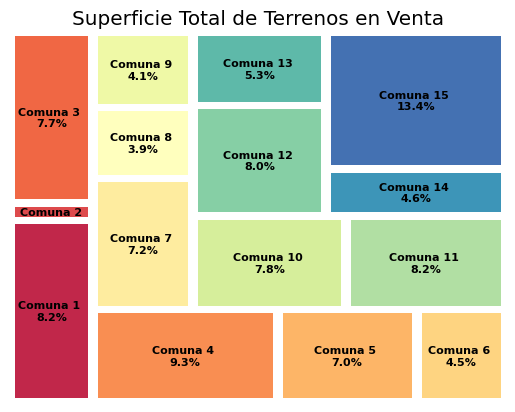

ValueError: too many values to unpack (expected 3)

In [84]:
import matplotlib.pyplot as plt
import squarify

# Datos
values = comunas_df.Superficie_porcentual.values
comunas = comunas_df.Comuna

labels = ['Comuna ' + str(i) + ' \n' + str(values[i-1]) + '%' for i in comunas]

# Comuna 2 xx% no entra en el recuadro, por lo que acorté esta label:
del labels[1]
labels.insert(1, 'Comuna 2')

# Treemap
fig = squarify.plot(sizes=values,
                    label=labels,
                    color=sns.color_palette("Spectral", 15),
                    pad=0.25,
                    text_kwargs={'fontsize':8, 'weight':'bold'},
                    alpha=1)

# Remuevo el eje:
plt.axis('off')
plt.title('Superficie Total de Terrenos en Venta')
plt.savefig('figura.png')

plt.show()

La Comuna 15 tiene la mayor superficie total en venta en comparación con las demás comunas, representando un 13.4% de la superficie en venta en la Ciudad de Buenos Aires. 
Le siguen las Comunas 4 y 1 con 9.3% y 8.2%, respectivamente. 

- Comunas con la mayor superficie promedio, según media y mediana. 

In [85]:
comunas_df.sort_values(by='Media', ascending=False).head(3)

,Comuna,Superficie_Total,Media,Mediana,sd,n,Superficie_porcentual
7,8,95790,1496.7,300.5,3367.5,64,3.9
0,1,203022,709.9,484.0,924.9,286,8.2
3,4,229387,589.7,328.0,787.2,389,9.3


In [86]:
comunas_df.sort_values(by='Mediana', ascending=False).head(3)

,Comuna,Superficie_Total,Media,Mediana,sd,n,Superficie_porcentual
0,1,203022,709.9,484.0,924.9,286,8.2
3,4,229387,589.7,328.0,787.2,389,9.3
4,5,173360,536.7,312.0,788.5,323,7.0


- Comunas con el menor tamaño promedio (mediana).

In [87]:
comunas_df.sort_values(by='Mediana', ascending=True).head(3)

,Comuna,Superficie_Total,Media,Mediana,sd,n,Superficie_porcentual
1,2,20346,415.2,224.0,514.6,49,0.8
11,12,198492,355.1,258.0,343.6,559,8.0
14,15,331743,428.6,259.0,757.5,774,13.4


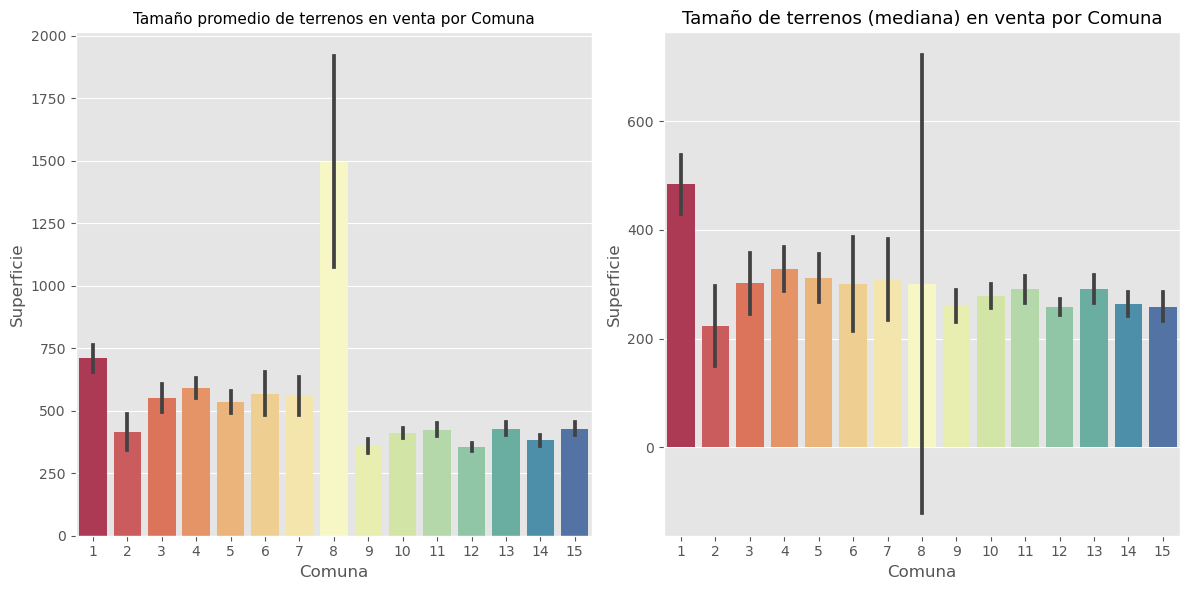

9:19: E251 unexpected spaces around keyword / parameter equals
21:80: E501 line too long (80 > 79 characters)


In [98]:
fig, ax = plt.subplots(1, 2,  figsize=(12, 6))

# Grafico de barras de la media de superficie por comuna con error estandar
sns.barplot(df_dolar_f, x="Comuna", y="Superficie",
            estimator="mean",
            errorbar='se',
            palette=sns.color_palette('Spectral', 15),
            fill=True,
            width= 0.8,
            ax=ax[0])
ax[0].set_title('Tamaño promedio de terrenos en venta por Comuna', fontsize=11)

# Grafico de barras de superficie mediana por comuna con error estándard
sns.barplot(df_dolar_f, x="Comuna", y="Superficie",
            estimator="median",
            errorbar='se',
            palette=sns.color_palette('Spectral', 15),
            fill=True,
            width=0.8,
            ax=ax[1])
ax[1].set_title('Tamaño de terrenos (mediana) en venta por Comuna', fontsize=13)
plt.tight_layout()

plt.show()

La Comuna 8 aparenta tener los terrenos con mayor extensión promedio, sin embargo, la dispersión de los datos es grande. Cuando se evalua la extensión en términos de la mediana, la Comuna 1 tiene los terrenos en venta más grandes en 'promedio'.  

### Test estadístico para comparación de superficie de terrenos de diferentes Comunas. 

Se evalua la diferencia de medianas entre la superficie de terrenos de diferentes comunas con el test Kruskal-Wallis (equivalente no-paramétrico de ANOVA de 1 factor). 
Se eligieron test no paramétricos debido a la asimetría en la distribución de la variable Superficie (ver Distribución más abajo). 

In [100]:
from pingouin import kruskal

# Test kruskal walis para la superficie según Comuna
kruskal(data=df_dolar_f, dv='Superficie', between='Comuna')

,Source,ddof1,H,p-unc
Kruskal,Comuna,14,201.126378,3.233670e-35


Hay difernecias significativas entre la superficie de los diferentes terrenos según la Comuna. 
En el mapa más abajo se muestra la significación de las comparaciones entre medianas realizadas mediante el test de Dunn ajustado por bonferroni. 

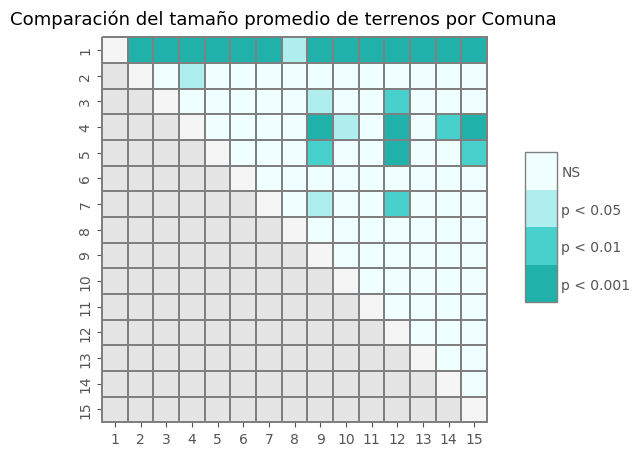

15:16: E124 closing bracket does not match visual indentation


In [106]:
import scikit_posthocs as sc

fig, ax = plt.subplots(figsize=(8, 5))

# Dunn'd test
dunn = sc.posthoc_dunn(a=df_dolar_f, val_col='Superficie',
                       group_col='Comuna', p_adjust='bonferroni')

# Colores y parametros para el heatmap con resultados del test de dunn
heatmap_args = {'linewidths': 0.25,
                'linecolor': '0.5',
                'clip_on': False,
                'square': True,
                'cbar_ax_bbox': [0.80, 0.35, 0.04, 0.3]
               }

colors = ['whitesmoke', 'azure', 'lightseagreen',
          'mediumturquoise', 'paleturquoise']

# Elimino la parte inferor de la diagonal
mask = dunn.copy()
mask.values[np.tril_indices_from(mask, k=0)] = np.nan

# Heatmap con p-valores de Dunn's test
# Elimino el cuadriculado de los valores faltantes del heatmap.

ax.grid(False)

# Heatmap
ax = sc.sign_plot(mask, **heatmap_args, cmap=colors)
plt.title('Comparación del tamaño promedio de terrenos por Comuna',
          y=1.8, fontsize=13, loc='right')

plt.show()

La superficie de los terrenos de la Comuna 1 es significativamente más grande que todas las demás comunas (p<0.001). 
A pesar de contar con la media de superficie más grande, la superficie de terrenos de la Comuna 8 no es significativamente diferente al resto de las comunas (con excepción de la Comuna 1, p=0.035). 
Los terrenos de la Comuna 2 son más significativamente más pequeños que los de las Comunas 1 (p=6.46x10^-8) y 4 (p=0.003), pero sin diferencias significativas respecto de las demás comunas (p>0.05). 

A pesar de que la Comuna 15 cuenta con la mayor superficie total en venta, la Comuna 8 presenta el valor promedio más alto del tamaño de terrenos en venta. 

### Distribución de la Superficie de terrenos por comuna. 


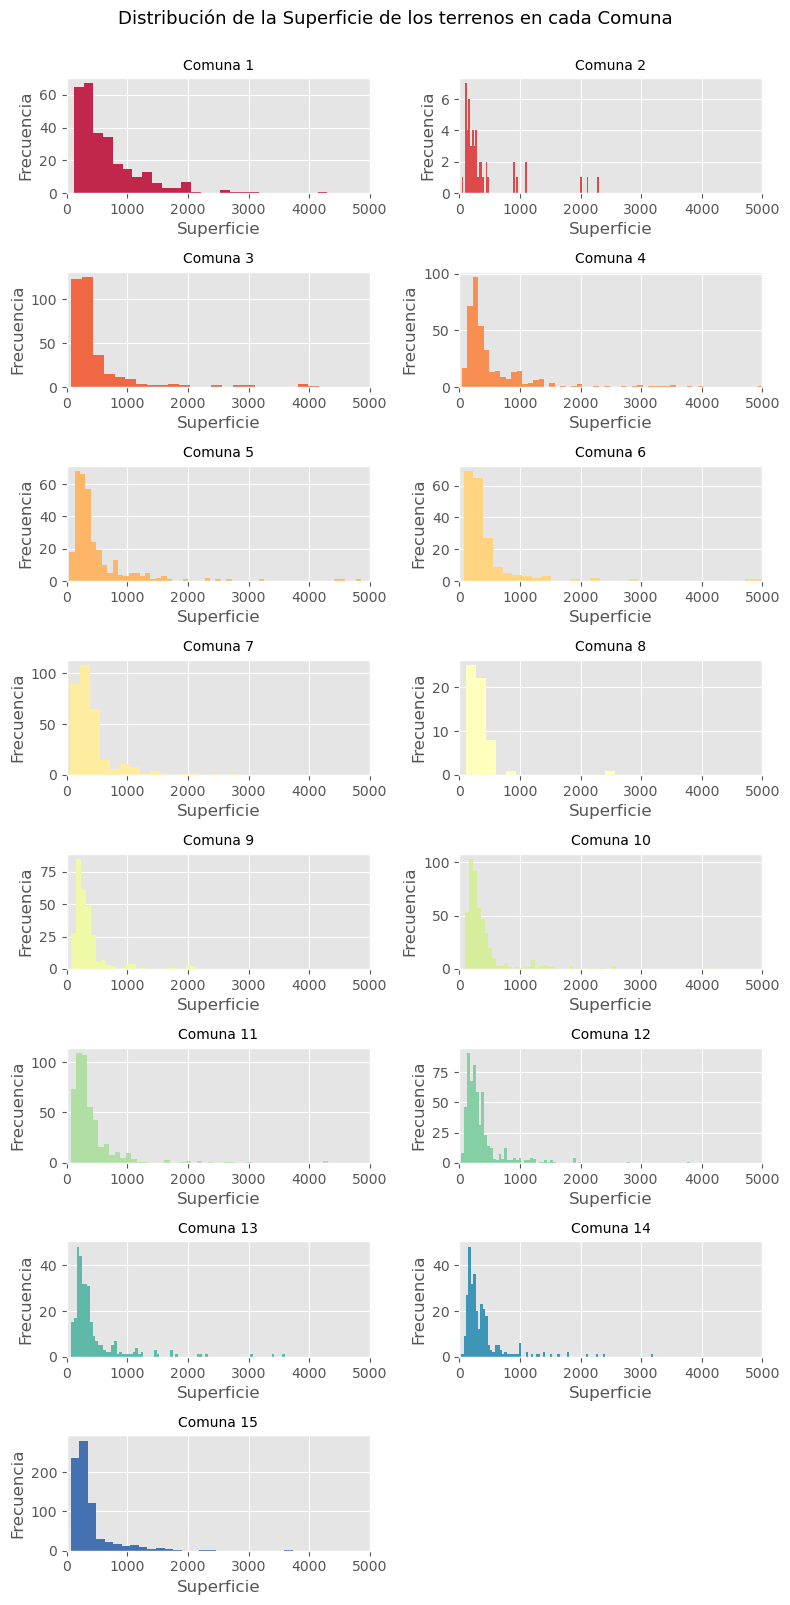

2:80: E501 line too long (97 > 79 characters)
12:80: E501 line too long (82 > 79 characters)


In [111]:
fig, ax = plt.subplots(8, 2, figsize=(8, 16))
fig.suptitle('Distribución de la Superficie de los terrenos en cada Comuna',
             fontsize=13, y=1.00)

comuna = [i for i in range(15)]
paleta = sns.color_palette('Spectral', n_colors=len(comuna))

for i in range(8):
    for j in range(2):
        comuna_n = i*2+j+1  # Calcula el nro de comuna de 1 a 16
        if comuna_n < 16:
            color = paleta[comuna_n-1]
            ax[i, j].hist(df_dolar_f[df_dolar_f.Comuna == comuna_n]['Superficie'],
                          bins=80, color=color)
            ax[i, j].set_xlim(0, 5000)
            ax[i, j].set_title(f'Comuna {comuna_n}', fontsize=10)
            ax[i, j].set_xlabel('Superficie')
            ax[i, j].set_ylabel('Frecuencia')
        if comuna_n == 16:  # Elimina el subplot vacío de comuna 16
            break
for i in range(len(comuna), len(ax.flat)):  # Oculta los subplots no utilizados
    ax.flat[i].set_visible(False)
plt.tight_layout()
plt.show()

In [114]:
comunas_cant = df_dolar_f.pivot_table(
    index='Comuna',
    values='Direccion',
    aggfunc='count'
)
comunas_cant.reset_index(inplace=True)

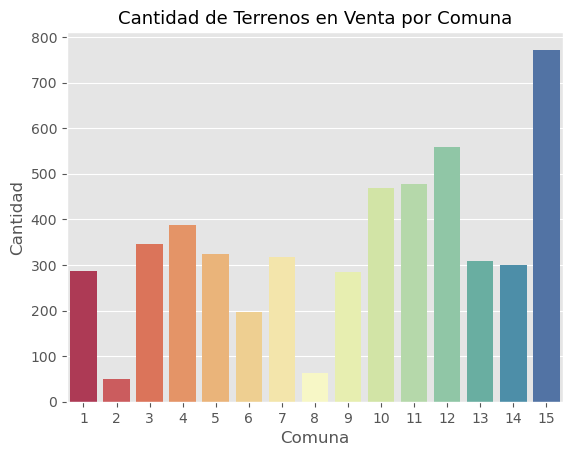

5:18: E124 closing bracket does not match visual indentation


In [117]:
ax2 = sns.barplot(data=comunas_cant, x='Comuna', y='Direccion',
                  palette=sns.color_palette('Spectral', 15),
                  fill=True,
                  width=0.8
                 )
plt.title('Cantidad de Terrenos en Venta por Comuna', fontsize=13)
ax2.set(ylabel='Cantidad')

plt.show()

## Precio del metro cuadrado por Comuna

In [121]:
comunas_precio = df_dolar_f.groupby('Comuna')['Dolarm2']
comunas_precio = comunas_precio.agg(['mean', 'sem']).reset_index()

# Renombrado de columnas
comunas_precio = comunas_precio.rename(columns=  
             {
                 'mean':'Dolarm2',
                 'sem':'SE'
             })
comunas_precio['Dolarm2'] = round(comunas_precio['Dolarm2'], 1)
comunas_precio['SE'] = round(comunas_precio['SE'], 1)
comunas_precio

,Comuna,Dolarm2,SE
0,1,2781.9,121.4
1,2,5922.3,537.1
2,3,2238.0,77.8
3,4,1456.2,58.9
4,5,2383.0,74.7
5,6,2995.3,125.0
6,7,1843.2,62.5
7,8,810.6,62.9
8,9,1338.1,38.5
9,10,1544.7,33.9


5:48: E251 unexpected spaces around keyword / parameter equals
5:48: W291 trailing whitespace
6:14: E128 continuation line under-indented for visual indent


ValueError: too many values to unpack (expected 3)

La Comuna 2 tiene el mayor precio promedio por metro cuadrado (en dólares), seguida de las comunas 14 y 14. 

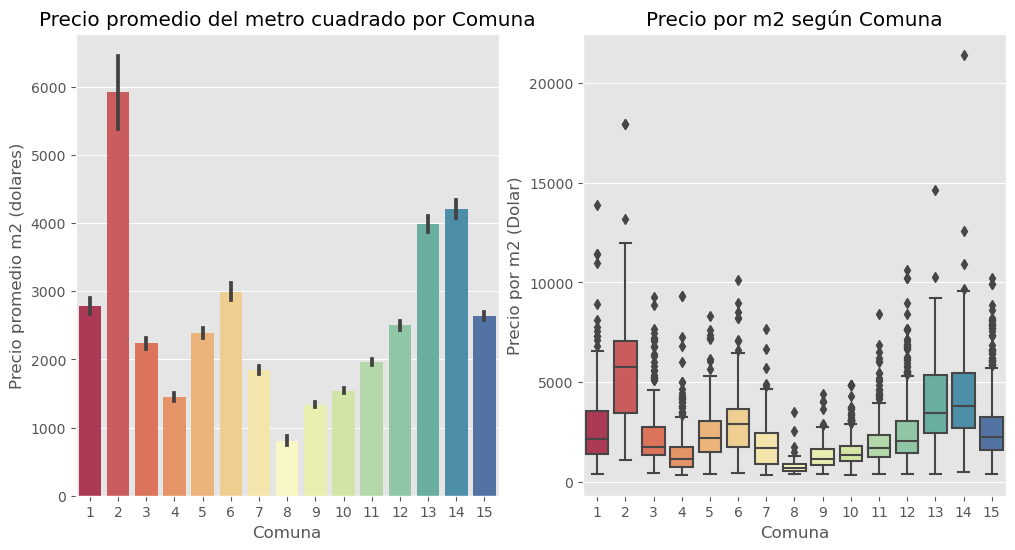

4:30: W291 trailing whitespace
6:55: W291 trailing whitespace
10:12: E124 closing bracket does not match visual indentation
18:20: E124 closing bracket does not match visual indentation


In [125]:
fig, ax = plt.subplots(1, 2,  figsize=(12, 6))

sns.barplot(data=df_dolar_f, x='Comuna', y='Dolarm2',
            estimator='mean', 
            errorbar='se',
            palette=sns.color_palette('Spectral', 15), 
            fill=True,
            width=0.8,
            ax=ax[0]
           )

ax[0].set_title('Precio promedio del metro cuadrado por Comuna')
ax[0].set(ylabel='Precio promedio m2 (dolares)')

ax[1] = sns.boxplot(data=df_dolar_f, x='Comuna', y='Dolarm2',
                    palette=sns.color_palette('Spectral', n_colors=15),
                    ax=ax[1]
                   )

ax[1].set_ylabel('Precio por m2 (Dolar)')
ax[1].set_title('Precio por m2 según Comuna')

plt.show()

In [ ]:
df_dolar_f.Dolarm2.describe()

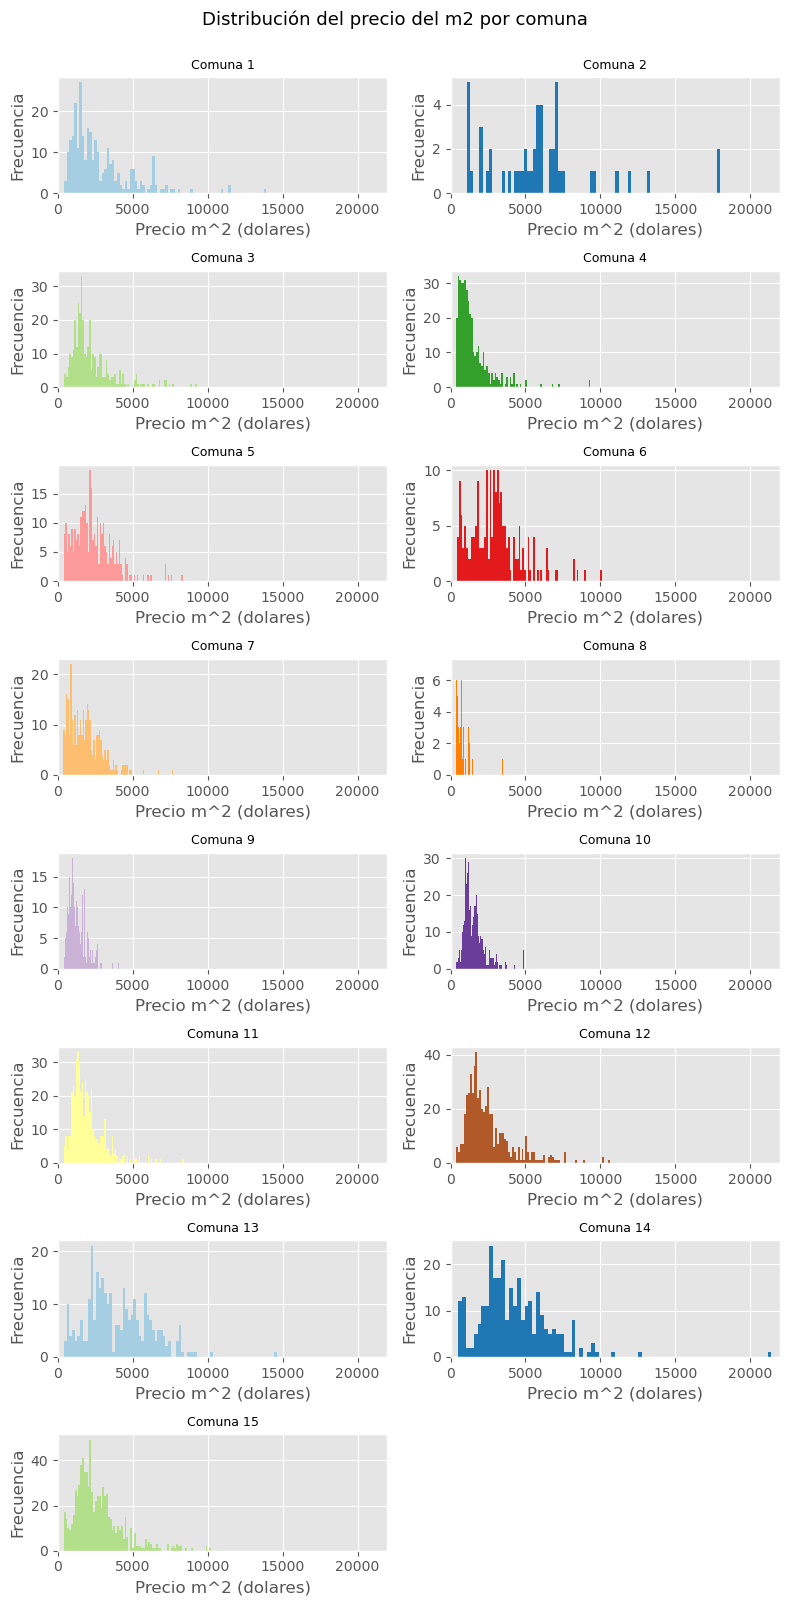

In [133]:
fig, ax = plt.subplots(8, 2, figsize=(8, 16))
fig.suptitle('Distribución del precio del m2 por comuna', fontsize=13, y=1.00)
comuna = [i for i in range(15)]

paleta = sns.color_palette('Paired', n_colors=len(comuna))

for i in range(8):
    for j in range(2):
        comuna_n = i*2+j+1  # Calcula el nro de comuna de 1 a 16
        if comuna_n < 16:
            color = paleta[comuna_n-1]
            ax[i, j].hist(df_dolar_f[df_dolar_f.Comuna == comuna_n]['Dolarm2'],
                          bins=80, color=color)
            ax[i, j].set_xlim(0, 22000)
            ax[i, j].set_title(f'Comuna {comuna_n}', fontsize=9)
            ax[i, j].set_xlabel('Precio m^2 (dolares)')
            ax[i, j].set_ylabel('Frecuencia')
        if comuna_n == 16:  # Elimina el subplot vacío de comuna 16
            break
for i in range(len(comuna), len(ax.flat)):  # Oculta los subplots no utilizados
    ax.flat[i].set_visible(False)
plt.tight_layout()
plt.show()

El grafico de Boxplot muestra nuevamente que la Comuna 2 registra el mayor precio (mediana) por metro cuadrado.

La Comuna 8 es la de menor precio promedio por m2.  
Las Comunas 8, 9, 4 y  10. son las de menor precio por metro cuadrado en promedio.

A partir de la distribución de precios por metro cuadrado por comuna se puede ver que hay mayor concentración de terrenos en el rango de precios bajo-medio. La distribución es claramente asimétrica.  
La Comuna 2 presenta una distribución de precios por metro cuadrado diferente a las demás comunas, con valores más extremos y menor cantidad de oferta. 

In [134]:
comunas_precio.sort_values(by='Dolarm2', ascending=True).head(4)

,Comuna,Dolarm2,SE
7,8,810.6,62.9
8,9,1338.1,38.5
3,4,1456.2,58.9
9,10,1544.7,33.9


2:1: W391 blank line at end of file


In [ ]:
df_dolar_f.columns

C:\Users\sonyd\AppData\Local\Temp\ipykernel_6504\2283617441.py:1: UserWarning: 
The palette list has fewer values (6) than needed (15) and will cycle, which may produce an uninterpretable plot.
  sns.scatterplot(x='Superficie', y='Dolarm2', data=df_dolar_f,


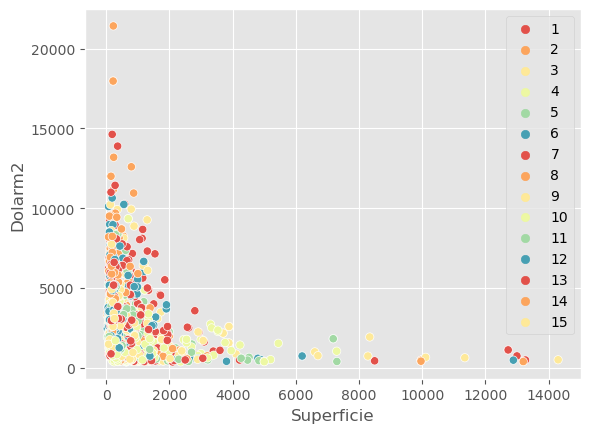

In [135]:
sns.scatterplot(x='Superficie', y='Dolarm2', data=df_dolar_f,
                hue='Comuna',
                palette=sns.color_palette("Spectral"))
plt.legend()

C:\Users\sonyd\anaconda3\Lib\site-packages\pandas\core\arraylike.py:402: RuntimeWarning: invalid value encountered in log2
  result = getattr(ufunc, method)(*inputs, **kwargs)


<Axes: xlabel='Superficie', ylabel='Dolarm2'>

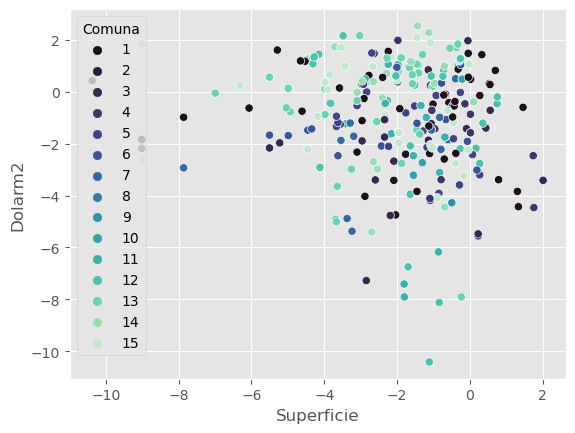

19:1: W391 blank line at end of file


In [136]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

columns_scaler = ['Superficie', 'Dolarm2', 'Preciousd']
df_dolar_std = scaler.fit_transform(df_dolar_f.loc[:, columns_scaler])
df_dolar_std = pd.DataFrame(df_dolar_std, index=df_dolar_f.index,
                            columns=columns_scaler)

df_dolar_std.head()
df_dolar_std['Comuna'] = df_dolar_f['Comuna']
df_dolar_std['Barrio'] = df_dolar_f['Barrio']
df_dolar_std.head()


# Data transformation to check separation of observations
df_dolar_std['Superficie'] = np.log2(df_dolar_std['Superficie'])
df_dolar_std['Dolarm2'] = np.log2(df_dolar_std['Dolarm2'])

sns.scatterplot(x='Superficie', y='Dolarm2', data=df_dolar_std,
                hue='Comuna', palette=sns.color_palette('mako', 15))

In [140]:
from sklearn.ensemble import IsolationForest
iso_forest = IsolationForest(max_samples="auto",
                             contamination=0.005,
                             random_state=1)
# Contaminacion default= 10%. baje a 1% para reducir el nro de outliers

X = df_dolar_f.loc[:, ['Superficie', 'Comuna', 'Dolarm2']]
iso_forest.fit(X)
outlier_pred = iso_forest.predict(X)
outlier_pred = [False if x == 1 else True for x in outlier_pred]
print(X[outlier_pred].shape)
X[outlier_pred].sort_values(by='Dolarm2')

,Superficie,Comuna,Dolarm2
4228,13200,8,379
1293,13200,8,379
4660,9963,8,402
462,9963,8,402
468,8495,7,424
4899,12886,6,466
437,9969,8,466
3748,9969,8,466
1292,9969,8,466
3863,13270,7,475


In [ ]:
df_dolar_f.dtypes

In [142]:
# Solo variables numericas
X = df_dolar_f.select_dtypes(include=['int64', 'float64'])
X.head()

,Superficie,Preciousd,Dolarm2,Comuna
0,190,150000,790,5
1,242,230000,950,5
2,211,265000,1256,5
3,320,300000,938,5
4,250,305000,1220,5


In [144]:
# Matriz de correlacion
corr_ma = X.corr(method='spearman')
corr_ma

,Superficie,Preciousd,Dolarm2,Comuna
Superficie,1.000000,0.584214,-0.272871,-0.137031
Preciousd,0.584214,1.000000,0.557527,0.064115
Dolarm2,-0.272871,0.557527,1.000000,0.216349
Comuna,-0.137031,0.064115,0.216349,1.000000
